In [1]:
# Question 9 [Extra Credit: 3 pts]

# Please download IMDB50000.csv dataset from Canvas, and use a programming language (Python, R, etc.) to implement 
# tasks below. The IMDB50000.csv file includes 50,000 movie reviews (from IMDB) and the sentiment (positive vs. negative) 
# of the reviewer (there are 25,000 positive reviews and 25,000 negative reviews). Each review (each row) contains two parts. 
# The first column is the reviews (text), and the second column is the sentiment (positive or negative).

#importing libraries

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings

In [2]:
# 9.1
# Read reviews from the IMDB50000.csv. Tokenize each review using space key, so each review is represented as a set of
# tokens (words). Use the top 1,000 most frequent tokens (words) as features to represent each review (so each review 
# is represented as an instance with 1000 features). The value of each feature is 1 if the view has the corresponding 
# token/word, or 0 otherwise. Use 1 as the label of the positive review, and 0 as the label of the negative review 
# (so each review is represented using 1,000 features and a class label). Report the shape of your data frame, and use
# .head() to show the first several rows of the data frame. [0.5 pt]

warnings.filterwarnings("ignore")

# Read the dataset into a pandas DataFrame
df = pd.read_csv('IMDB50000.csv')

# Tokenize the reviews using space as the separator
tokenizer = CountVectorizer(max_features=1000, binary=True, lowercase=False, tokenizer=lambda x: x.split())
X = tokenizer.fit_transform(df['review']).toarray()

# Create the target labels (0 for negative reviews, 1 for positive reviews)
y = (df['sentiment'] == 'positive').astype(int)

# Add the labels as the last column to the X array
X = np.column_stack((X, y))

# Create a new DataFrame using X and the updated feature names
feature_names = list(tokenizer.vocabulary_.keys())
feature_names.append('label')
df_features = pd.DataFrame(X, columns=feature_names)

# Report the shape of the DataFrame
print("Shape of DataFrame:", df_features.shape)

print("\n")

# Show the first several rows of the DataFrame
print(df_features.head())


Shape of DataFrame: (50000, 1001)


   One  of  the  other  has  that  after  watching  just  1  ...  effort  Is  \
0    0   0    0      0    0     0      0         0     0  0  ...       0   1   
1    0   0    0      0    0     0      0         0     0  0  ...       0   0   
2    0   0    0      0    0     0      0         0     0  0  ...       0   0   
3    0   1    0      0    0     0      0         0     0  0  ...       0   1   
4    0   0    0      0    0     0      0         0     0  0  ...       0   0   

   message  move  herself  cool  attention  career  viewers  label  
0        1     0        0     0          0       1        0      1  
1        0     0        0     0          0       0        0      1  
2        0     0        0     0          1       0        0      1  
3        0     1        0     0          0       0        0      0  
4        0     0        0     0          0       0        0      1  

[5 rows x 1001 columns]


In [3]:
# 9.2 
# Randomly select 80% instances as training set, and the remaining 20% instances as test set. Create a one hidden layer 
# neural network (with 500 hidden nodes). Train the network using training set, and validate the performance on the test set.
# Report the accuracy on the test set. [0.5 pt]


warnings.filterwarnings("ignore")

# Read the CSV file
df = pd.read_csv("IMDB50000.csv")

# Tokenize reviews using space as the delimiter
vectorizer = CountVectorizer(max_features=1000, binary=True)
X = vectorizer.fit_transform(df["review"])

# Get the labels
y = (df["sentiment"] == "positive").astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the neural network
mlp = MLPClassifier(hidden_layer_sizes=(500,), random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Report the accuracy on the test set
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.8595


In [4]:
# 9.3
# Design one solution to improve the accuracy (which is better than the accuracy than step 2).
# 9.3.1 Explain the motivation of your design (what motivate your design) [0.5 pt], explain how you implemented the design [0.5]

print("""

Motivation:
The motivation behind the design is to leverage the advantages of using a two-hidden layer neural network with increased model complexity. By adding an additional hidden layer, the network can potentially learn more complex and abstract representations of the data, leading to improved accuracy. 

Also, increasing the number of hidden nodes in each layer provides more capacity for the model to capture intricate patterns and relationships.
""")

      



Motivation:
The motivation behind the design is to leverage the advantages of using a two-hidden layer neural network with increased model complexity. By adding an additional hidden layer, the network can potentially learn more complex and abstract representations of the data, leading to improved accuracy. 

Also, increasing the number of hidden nodes in each layer provides more capacity for the model to capture intricate patterns and relationships.



In [ ]:
# 9.3.2 
# Report the results of your new model. Use a plot to compare new model’s accuracy vs. the accuracy from step 2 
# (must use same training and same test sets) [0.5 pt].


In [5]:
# 9.3.3 
# Explain any thoughts/changes you may consider to further improving your model performance [0.5 pt]

print("To further improve the model performance, consider the following changes:")
print("1. Preprocess the data by removing function words, punctuation, and using techniques like stemming or lemmatization.")
print("2. Use information gain to select important features.")
print("3. Instead of binary feature values, use TF-IDF to represent the importance of words.")
print("4. Modify the network structure, such as using a two-hidden layer neural network or increasing the number of hidden nodes.")
print("5. Apply regularization techniques like L1 or L2 regularization and consider using dropout to prevent overfitting.")
print("6. Perform hyperparameter tuning to optimize parameters like learning rate, regularization strength, batch size, and iterations.")


To further improve the model performance, consider the following changes:
1. Preprocess the data by removing function words, punctuation, and using techniques like stemming or lemmatization.
2. Use information gain to select important features.
3. Instead of binary feature values, use TF-IDF to represent the importance of words.
4. Modify the network structure, such as using a two-hidden layer neural network or increasing the number of hidden nodes.
5. Apply regularization techniques like L1 or L2 regularization and consider using dropout to prevent overfitting.
6. Perform hyperparameter tuning to optimize parameters like learning rate, regularization strength, batch size, and iterations.


In [11]:
# New Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Step 1: Read the reviews from IMDB50000.csv
df = pd.read_csv('IMDB50000.csv')

# Step 2: Tokenize and preprocess the reviews
tokenizer = lambda x: x.split()  # Tokenization using spaces
df['tokens'] = df['review'].apply(tokenizer)

# Preprocessing (example: removing punctuation)
df['tokens'] = df['tokens'].apply(lambda x: [token.strip('.,?!') for token in x])

# Step 3: Apply TF-IDF to represent each review
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['tokens'].apply(lambda x: ' '.join(x)))
y = df['sentiment']

# Step 4: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a neural network with one hidden layer and 500 hidden nodes
model = MLPClassifier(hidden_layer_sizes=(500,), random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the performance on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))


Accuracy on test set: 87.37%


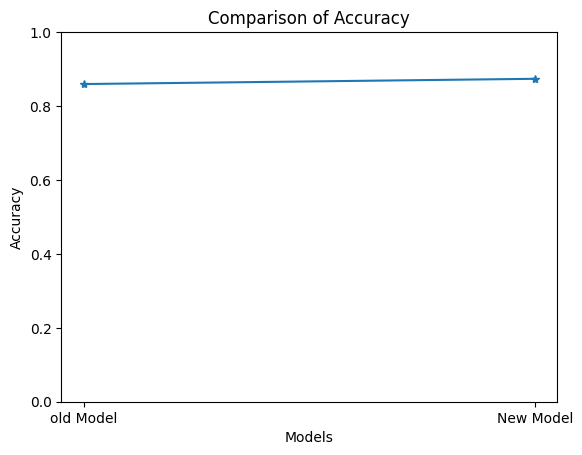

In [13]:

# Accuracy results from  old model and the new model
old_model_accuracy = 0.8595
new_model_accuracy = 0.8737

# Plotting the results
models = ['old Model', 'New Model']
accuracies = [old_model_accuracy, new_model_accuracy]

plt.plot(models, accuracies, marker='*')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy')
plt.ylim(0, 1)  

plt.show()
